In [ ]:
# Eng/Amr Mostafa Omar
# Nile University ,Cairo, Egypt
# Data 26/4/2024

##**The methodology used in this project involves several steps:**

###**1-Data Preprocessing:**
* Handling Missing Values: Fill missing values in the 'summary' column with a placeholder text.

* Language Translation: Translate non-English text data to English.
Text Cleaning: Remove non-alphanumeric characters, single letters, numbers, non-English characters, words with numbers, and words with special characters. Convert text to lowercase.

* Text Tokenization: Tokenize text data into words and pad sequences to ensure uniform length.

* Image Preprocessing: Load images, convert to grayscale, resize to 64x64 pixels, and store as arrays.

###**2-Model Development:**
- **Text Model:**
Construct sequential models with embedding layers followed by GRU and BiDirectional layers for text input.

- **Image Model:**
 Build sequential models using Conv2D layers for image input and including dropout layers for regularization.

- **Multi-modality Model:**
 Create models to combine text and image inputs using concatenation layers.

- **Multi-objective Model:**
Design a multi-objective model to predict both price and type categories simultaneously, with separate output layers for each task.

###**3-Model Training:**
Compile models with appropriate loss functions (sparse categorical cross-entropy), optimizers (Adam), and metrics (accuracy).
Train models using the training data, with validation data used for model evaluation and potential early stopping.
###**4-Model Evaluation:**
Evaluate models on the validation data using metrics such as accuracy.
For multi-objective learning, conduct separate evaluations for each task ( price prediction and type prediction).
###**5-Results Analysis:**
Analyze evaluation results, including accuracy scores and loss values, to assess the performance of each model.
Calculate overall accuracy for multi-objective learning by considering the accuracy of both price and type predictions.

##**1.Problem Definition:**

- **Input:** The input consists of listing characteristics such as location, size, amenities, ratings, and other relevant features.

- **Output:** The output is the predicted pricing category for each listing, categorized into beginner, plus, or premium (denoted as 0, 1, or 2).
Data Mining Function Required: Supervised learning algorithms for classification are required to predict the pricing bins based on the input features.

##**2. Challenges:**

- **Data Quality:** Ensuring the quality and completeness of the dataset, handling missing values, and dealing with outliers.

- **Feature Engineering:**
 Extracting meaningful features from the dataset that significantly contribute to predicting pricing categories.

- **Model Selection:**
Choosing appropriate classification algorithms and evaluating their performance to select the best model.
- **Imbalanced Classes:**
 Addressing potential class imbalance issues if one pricing category has significantly fewer instances than others.

##**3. Impact:**

- **User Experience:** Improving user experience by providing new hosts with recommended pricing ranges based on listing characteristics.

- **Market Competitiveness:** Helping hosts optimize their pricing strategy, which can contribute to their competitiveness in the Airbnb market.

- **Ease of Entry for New Hosts:** Lowering the barrier for new hosts by providing guidance on pricing, thus encouraging more listings and diversity on the platform.

##**4. Ideal Solution:**
The ideal solution was found in Trial 2, but in Trial 7, we found that price prediction is 59.31% and type prediction is 72.67%. The overall accuracy is 65.99%. We believe accuracy may be enhanced if we use a pretrained model like VGG16.

In [ ]:
#Installing some libiraries
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=8a90ca22d49840dadb66a29dea1e081ca2369cbdf0d5c6e0305de5266e62f7b4
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.1 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17395 sha256=1f98fd6cdcceb29dc5ddd9ef80001b3309ef8fdb88c64fbb75d5dc01aadd630d
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling c

In [ ]:
# Import  libraries
import pandas as pd
import numpy as np
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
import xgboost as xgb
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.base import BaseEstimator, TransformerMixin
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from bokeh.models import NumeralTickFormatter
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from wordcloud import WordCloud
from collections import Counter
from PIL import Image
import cv2
from googletrans import Translator
from langdetect import detect
import nltk
from tqdm import tqdm
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Mount Google Drive to access files
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##**2-Data Loading:**

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/train_xy_4.csv')

In [ ]:
data.shape

(7627, 4)

###**Exploration of  dataset**

In [ ]:
# Check the first few rows of the dataset
print("First few rows of the dataset:")
data.head(10)

First few rows of the dataset:


,summary,image,type,price
0,"Spacious, sunny and cozy modern apartment in t...",img_train/0.jpg,Apartment,1
1,Located in one of the most vibrant and accessi...,img_train/1.jpg,Apartment,0
2,Logement coquet et douillet à 10 minutes du ce...,img_train/2.jpg,Apartment,1
3,"Beautiful and spacious (1076 sc ft, / 100 mc) ...",img_train/3.jpg,Apartment,1
4,Très grand appartement ''rustique'' et très ag...,img_train/4.jpg,Apartment,0
5,"Small and cozy studio, all equipped, ideally s...",img_train/5.jpg,Apartment,0
6,Charming apartment! A place where you will fee...,img_train/6.jpg,Apartment,0
7,Grande chambre dans une maison pour étudiants....,img_train/7.jpg,House,0
8,Mon logement est à: - 5 minutes de marche du ...,img_train/8.jpg,Townhouse,0
9,Wonderful and charming house located on the is...,img_train/9.jpg,House,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7627 entries, 0 to 7626
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   summary  7326 non-null   object
 1   image    7627 non-null   object
 2   type     7627 non-null   object
 3   price    7627 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 238.5+ KB


In [ ]:
# Summary statistics for numerical features
print(data.describe())

             price
count  7627.000000
mean      0.442769
std       0.611946
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       2.000000


In [ ]:
data.columns

Index(['summary', 'image', 'type', 'price'], dtype='object')

In [ ]:
# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
summary    301
image        0
type         0
price        0
dtype: int64


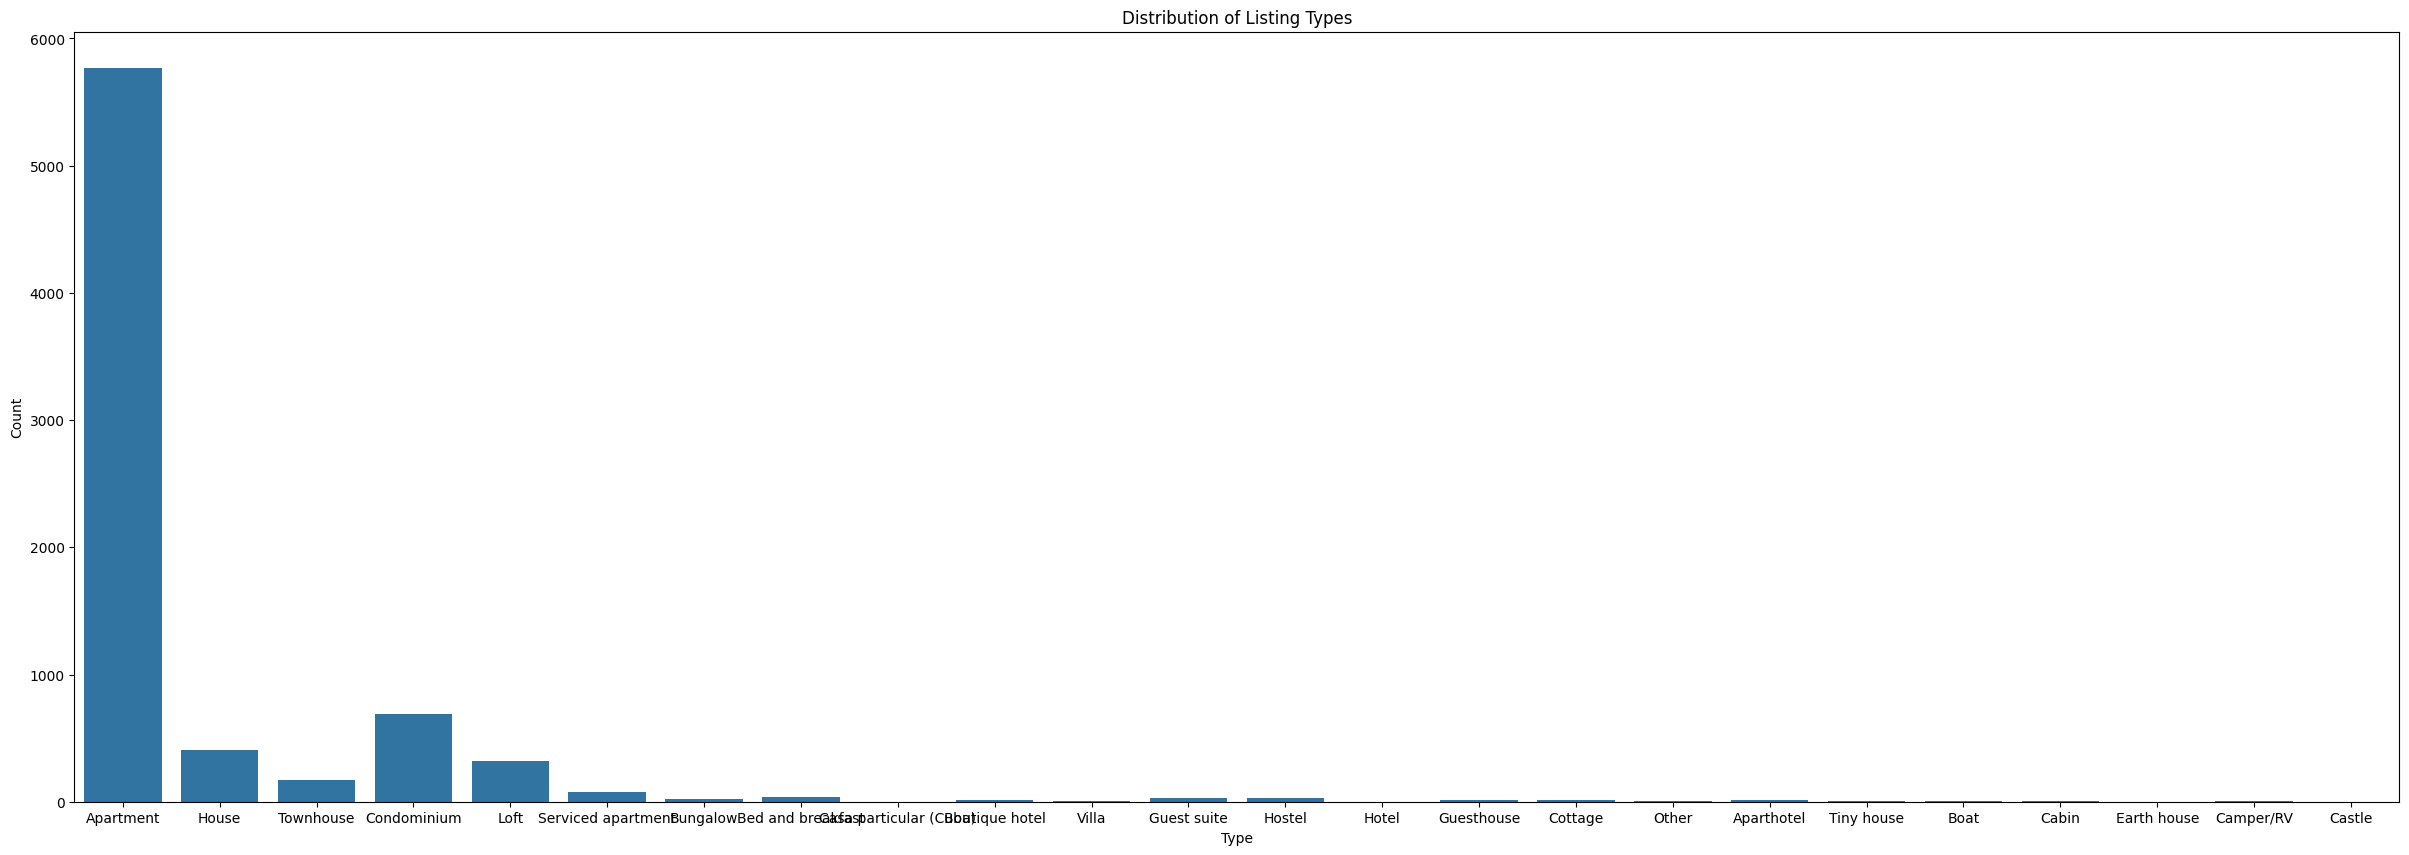

In [ ]:
# Visualization of categorical features
plt.figure(figsize=(30, 10))
sns.countplot(x='type', data=data)
plt.title('Distribution of Listing Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

##`This plot provides valuable insights into the distribution of listing types in the dataset, which can inform further analysis and decision-making in the context of rental property management or analysis.`

In [ ]:
unique_types = data['type'].unique()
print(unique_types)

['Apartment' 'House' 'Townhouse' 'Condominium' 'Loft' 'Serviced apartment'
 'Bungalow' 'Bed and breakfast' 'Casa particular (Cuba)' 'Boutique hotel'
 'Villa' 'Guest suite' 'Hostel' 'Hotel' 'Guesthouse' 'Cottage' 'Other'
 'Aparthotel' 'Tiny house' 'Boat' 'Cabin' 'Earth house' 'Camper/RV'
 'Castle']


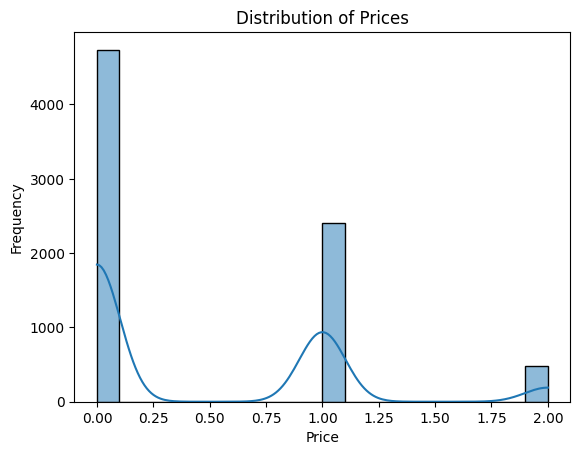

In [ ]:
# Visualization of numerical features
sns.histplot(data['price'], bins=20, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

###`This plot provides insights into the distribution of prices in the dataset, which can be useful for understanding the pricing dynamics and making informed decisions related to pricing strategies or analysis.`

In [ ]:
text_data = ' '.join(data['summary'].astype(str))
wordcloud = WordCloud(width=800, height=400).generate(text_data)

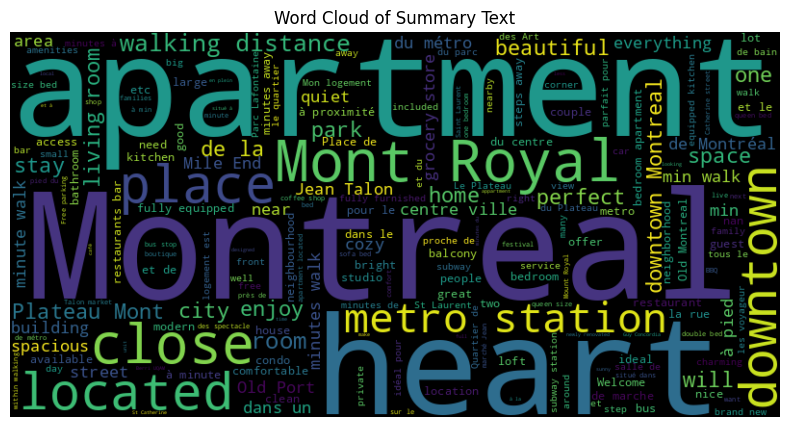

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Summary Text')
plt.show()

`This word cloud gives a visual summary of the key words and themes present in the summary text of your dataset, providing useful insights into the nature of the listings`.

In [ ]:
import langdetect

In [ ]:
def text_analysis(text_data):
    # Initialize lists to store detected languages and their corresponding text snippets
    detected_languages = []
    texts_by_language = {}

    # Iterate through each text snippet
    for text in text_data:
        # Detect the language of the text snippet
        try:
            lang = langdetect.detect(text)
        except:
            # Handle cases where language detection fails
            lang = 'unknown'
        detected_languages.append(lang)

        # Add the text snippet to the corresponding language list
        if lang not in texts_by_language:
            texts_by_language[lang] = []
        texts_by_language[lang].append(text)

    # Print detected languages and their counts
    print("Detected languages:")
    print(Counter(detected_languages))

    # Print text snippets for each detected language
    for lang, texts in texts_by_language.items():
        print(f"\nTexts in {lang} language:")
        # Print first 5 snippets for each language
        for idx, text in enumerate(texts[:5]):
            print(f"{idx + 1}. {text}")

In [ ]:
# Perform text analysis on the 'summary' column
text_data = data['summary'].astype(str).tolist()
text_analysis(text_data)

Detected languages:
Counter({'en': 5262, 'fr': 2032, 'tl': 301, 'zh-cn': 9, 'es': 6, 'de': 5, 'ko': 3, 'af': 2, 'nl': 1, 'ca': 1, 'da': 1, 'pt': 1, 'vi': 1, 'ro': 1, 'id': 1})

Texts in en language:
1. Spacious, sunny and cozy modern apartment in the heart of Montreal. This 3 bedroom centrally located in the very popular Plateau Mont-royal neighborhood in the middle of prince-arthur pedestrian-only street. Close to all amenities ( Restaurants, coffee house, bars, clubs, shopping, universities, subway stations). Experience Montreal like a real local resident, be in the heart of the action: grand prix week, grill Saint-Laurent festival, mural 2019 and so much more!
2. Located in one of the most vibrant and accessible locations of downtown Montreal, this one bedroom condo will not only impress you but leave you with one of the most memorable experiences. It is walking distance of the popular Sainte-Catherine Street, the Bell Center, the Old Port, Lachine Canal, Bonaventure metro, and much

In [ ]:
def display_images(image_paths):
    num_images = len(image_paths)
    fig, axes = plt.subplots(1, num_images, figsize=(10*num_images, 10))
    for i, path in enumerate(image_paths):
        img = Image.open(path)
        axes[i].imshow(img)
        axes[i].axis('off')
    plt.show()

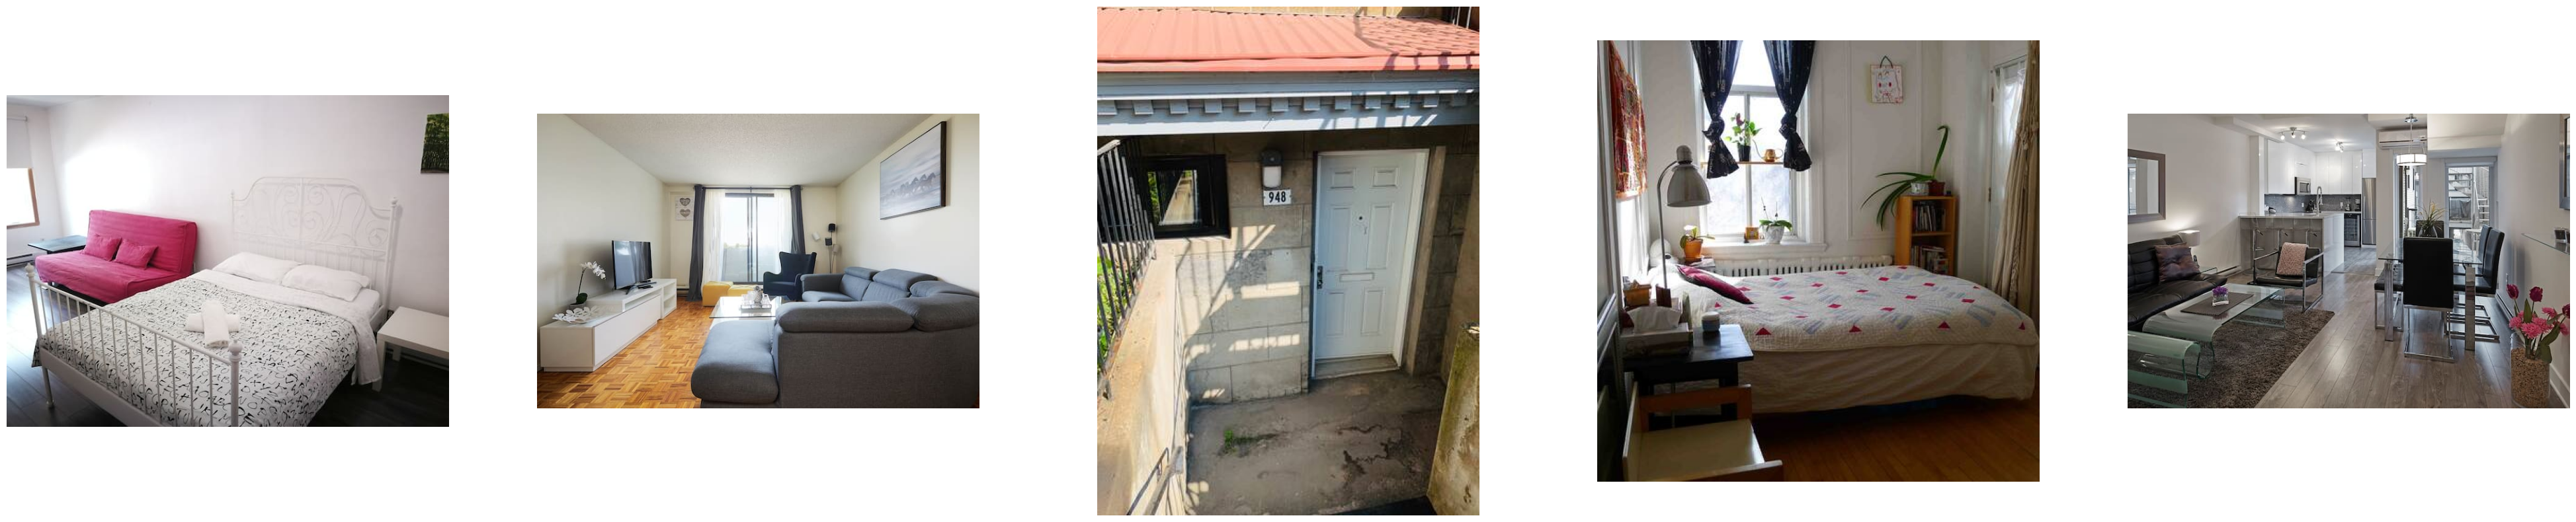

In [ ]:
# Directory containing the images
image_directory = '/content/gdrive/MyDrive/img_train'

# Get the list of image file names in the directory, excluding directories
image_files = [filename for filename in os.listdir(image_directory)
               if os.path.isfile(os.path.join(image_directory, filename))]

# Create the full paths to the images
image_paths = [os.path.join(image_directory, filename) for filename in image_files]

# Display the first few images
display_images(image_paths[:5])


## **Data Cleaning and  Preprocessing**

In [ ]:
# Fill missing values in 'summary' column with a placeholder text
data['summary'].fillna('No summary available', inplace=True)

In [ ]:
#  Translate text data in other languages to English
# Initialize translator
translator = Translator()

# Function to translate text to English with error handling
def translate_to_english(text):
    try:
        # Detect the language of the text
        lang = detect(text)
        # If language is not English, translate the text
        if lang != 'en':
            # Translate with error handling for potential translation errors
            translated = translator.translate(text, src=lang, dest='en')
            return translated.text
        else:
            # Return original text if already in English
            return text
    except Exception as e:
        print(f"Error occurred during translation: {str(e)}")
        # Return original text in case of error
        return text

#  Apply translation function to 'summary' column in DataFrame
data['summary'] = data['summary'].apply(translate_to_english)

Error occurred during translation: 'Translator' object has no attribute 'raise_Exception'
Error occurred during translation: 'Translator' object has no attribute 'raise_Exception'
Error occurred during translation: 'Translator' object has no attribute 'raise_Exception'
Error occurred during translation: 'Translator' object has no attribute 'raise_Exception'
Error occurred during translation: 'Translator' object has no attribute 'raise_Exception'
Error occurred during translation: 'Translator' object has no attribute 'raise_Exception'
Error occurred during translation: 'Translator' object has no attribute 'raise_Exception'
Error occurred during translation: 'Translator' object has no attribute 'raise_Exception'
Error occurred during translation: 'Translator' object has no attribute 'raise_Exception'
Error occurred during translation: 'Translator' object has no attribute 'raise_Exception'
Error occurred during translation: 'Translator' object has no attribute 'raise_Exception'
Error occu

In [ ]:
# Check the updated DataFrame
print(data.head(10))

                                             summary            image  \
0  Spacious, sunny and cozy modern apartment in t...  img_train/0.jpg   
1  Located in one of the most vibrant and accessi...  img_train/1.jpg   
2  Coquet and cozy accommodation 10 minutes from ...  img_train/2.jpg   
3  Beautiful and spacious (1076 sc ft, / 100 mc) ...  img_train/3.jpg   
4  Very large '' rustic '' 'and very pleasant apa...  img_train/4.jpg   
5  Small and cozy studio, all equipped, ideally s...  img_train/5.jpg   
6  Charming apartment! A place where you will fee...  img_train/6.jpg   
7  Large room in a house for students.5 minutes w...  img_train/7.jpg   
8  My accommodation is at: - 5 minutes of walking...  img_train/8.jpg   
9  Wonderful and charming house located on the is...  img_train/9.jpg   

        type  price  
0  Apartment      1  
1  Apartment      0  
2  Apartment      1  
3  Apartment      1  
4  Apartment      0  
5  Apartment      0  
6  Apartment      0  
7      House      0 

In [ ]:
data.shape

(7627, 4)

In [ ]:
# Function to clean text data
def clean_text(text):
    # Remove non-alphanumeric characters
    text = re.sub(r'\W+', ' ', str(text))
    # Remove single letters
    text = re.sub(r'\b\w{1}\b', '', str(text))
    # Remove numbers
    text = re.sub(r'\b\d+\b', '', str(text))
    # Remove non-English characters (keep only English words)
    text = re.sub(r'[^\x00-\x7F]+', '', str(text))
    # Remove words with numbers
    text = re.sub(r'\b\w*\d\w*\b', '', str(text))
    # Remove words with special characters
    text = re.sub(r'\b\w*[^\w\s]+\w*\b', '', str(text))
    # Convert text to lowercase
    text = text.lower()
    return text

In [ ]:
# Function to  preprocess text data
def preprocess_text(text):
    # Clean text
    cleaned_text = clean_text(text)
    # Tokenize text into words
    words = word_tokenize(cleaned_text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    # Join words back into text
    preprocessed_text = ' '.join(words)
    return preprocessed_text

In [ ]:
# Clean and preprocess the 'summary' column
data['cleaned_summary'] = data['summary'].apply(clean_text)
data['preprocessed_summary'] = data['cleaned_summary'].apply(preprocess_text)

# Print the cleaned and preprocessed text for the first few rows
print(data[['summary', 'cleaned_summary', 'preprocessed_summary']].head())

                                             summary  \
0  Spacious, sunny and cozy modern apartment in t...   
1  Located in one of the most vibrant and accessi...   
2  Coquet and cozy accommodation 10 minutes from ...   
3  Beautiful and spacious (1076 sc ft, / 100 mc) ...   
4  Very large '' rustic '' 'and very pleasant apa...   

                                     cleaned_summary  \
0  spacious sunny and cozy modern apartment in th...   
1  located in one of the most vibrant and accessi...   
2  coquet and cozy accommodation  minutes from do...   
3  beautiful and spacious  sc ft  mc condo on the...   
4  very large rustic and very pleasant apartment ...   

                                preprocessed_summary  
0  spacious sunny cozy modern apartment heart mon...  
1  located one vibrant accessible location downto...  
2  coquet cozy accommodation minute downtown mont...  
3  beautiful spacious sc ft mc condo floor west i...  
4  large rustic pleasant apartment live nice neig..

In [ ]:
max_words = 40000  # Maximum number of unique words in text data
max_text_length = 100  # Maximum length of text sequences
embedding_dim = 100  # Dimension of word embeddings

In [ ]:
#  Tokenize text data
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['preprocessed_summary'])
sequences = tokenizer.texts_to_sequences(data['preprocessed_summary'])
X_text = pad_sequences(sequences, maxlen=max_text_length)

In [ ]:
data.shape

(7627, 6)

In [ ]:
# Function to preprocess images
def preprocess_image(image_path):
    try:
        # convert to grayscale ('LA') format, then resize to 64x64 pixels
        image = Image.open(image_path).convert('LA').resize((64, 64))
        # Keep only the grayscale channel
        image_array = np.array(image)[:, :, 0]
    except Exception as e:
        print(f"Error loading image: {e}")
        # Zero-filled array for error cases
        image_array = np.zeros((64, 64))
    return image_array

In [ ]:
# Directory path containing images
input_dir = "/content/gdrive/MyDrive/img_train"

# List to store preprocessed images
preprocessed_images = []

In [ ]:
import os
# Loop through each image in the directory
for filename in os.listdir(input_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Construct the full path to the image file
        image_path = os.path.join(input_dir, filename)
        # Preprocess the image and append to the list
        preprocessed_image = preprocess_image(image_path)
        preprocessed_images.append(preprocessed_image)


Error loading image: cannot identify image file '/content/gdrive/MyDrive/img_train/6083.jpg'
Error loading image: cannot identify image file '/content/gdrive/MyDrive/img_train/4176.jpg'


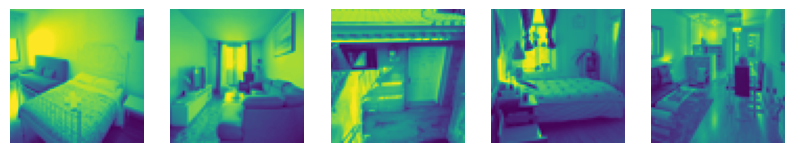

In [ ]:
# Plot the first 5 preprocessed images
num_images_to_display = 5
plt.figure(figsize=(10, 5))
for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(preprocessed_images[i])
    plt.axis('off')

# Show the plot with the first 5 preprocessed images
plt.show()

In [ ]:
preprocessed_images=np.array(preprocessed_images)

In [ ]:
X_text.shape

(7627, 100)

## **Split data into training and validation set**

In [ ]:
# Split the text data into train and validation sets
X_train_text, X_val_text, y_train_text, y_val_text = train_test_split(X_text, data['price'],test_size=0.2, random_state=42, stratify=data['price'] , shuffle=True)

In [ ]:
# Print the shapes of the split text datasets
print("Training text data shape:", X_train_text.shape)
print("Validation text data shape:", X_val_text.shape)
print("Training labels shape:", y_train_text.shape)
print("Validation labels shape:", y_val_text.shape)

Training text data shape: (6101, 100)
Validation text data shape: (1526, 100)
Training labels shape: (6101,)
Validation labels shape: (1526,)


In [ ]:
# Split the img data into train and validation sets
X_train_img, X_val_img, y_train_img, y_val_img = train_test_split(preprocessed_images, data['price'], test_size=0.2, random_state=42, stratify=data['price'] , shuffle=True)

In [ ]:
# Print the shapes of the split datasets
print("Training text data shape:", X_train_img.shape)
print("Validation text data shape:", X_val_img.shape)
print("Training labels shape:", y_train_img.shape)
print("Validation labels shape:", y_val_img.shape)

Training text data shape: (6101, 64, 64)
Validation text data shape: (1526, 64, 64)
Training labels shape: (6101,)
Validation labels shape: (1526,)


In [ ]:
X_train_text

array([[   0,    0,    0, ...,  179, 1775,  763],
       [   0,    0,    0, ...,  194,  713,  670],
       [   0,    0,    0, ...,  269,  249,  337],
       ...,
       [   0,    0,    0, ...,  112,   59,  526],
       [   0,    0,    0, ...,   12,  170,   68],
       [   0,    0,    0, ...,  173,  152,   50]], dtype=int32)

##**Expectation :Trial 1**

Moderate accuracy due to sequential data processing. The use of GRU layers with text inputs is expected to provide a foundational understanding of sequential data processing, potentially leading to moderate accuracy. This trial focuses on processing text data using recurrent neural network (RNN) variants like GRU (Gated Recurrent Unit) , which are well-suited for capturing sequential dependencies in data.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Bidirectional, Conv2D, Flatten, Dropout, concatenate
from sklearn.metrics import accuracy_score

##**Trial 1: Text Inputs with GRU**

In [ ]:
model_1 = Sequential()
model_1.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_text_length))
model_1.add(GRU(128))
model_1.add(Dense(3, activation='softmax'))

model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_1.fit(X_train_text, y_train_text, batch_size=64, epochs=10, validation_data=(X_val_text, y_val_text))

# Evaluate the model
y_pred = model_1.predict(X_val_text)
accuracy = accuracy_score(y_val_text, np.argmax(y_pred, axis=1))
print(f"Trial 1 Accuracy: {accuracy}")


Epoch 1/10
96/96 [==============================] - 30s 288ms/step - loss: 0.8540 - accuracy: 0.6166 - val_loss: 0.8137 - val_accuracy: 0.6337
Epoch 2/10
96/96 [==============================] - 28s 291ms/step - loss: 0.7123 - accuracy: 0.6709 - val_loss: 0.7832 - val_accuracy: 0.6540
Epoch 3/10
96/96 [==============================] - 27s 279ms/step - loss: 0.5755 - accuracy: 0.7556 - val_loss: 0.8293 - val_accuracy: 0.6383
Epoch 4/10
96/96 [==============================] - 30s 318ms/step - loss: 0.4533 - accuracy: 0.8120 - val_loss: 0.9028 - val_accuracy: 0.6442
Epoch 5/10
96/96 [==============================] - 30s 309ms/step - loss: 0.3728 - accuracy: 0.8485 - val_loss: 1.0841 - val_accuracy: 0.6501
Epoch 6/10
96/96 [==============================] - 31s 328ms/step - loss: 0.3039 - accuracy: 0.8774 - val_loss: 1.2426 - val_accuracy: 0.6494
Epoch 7/10
96/96 [==============================] - 29s 305ms/step - loss: 0.2506 - accuracy: 0.9054 - val_loss: 1.3297 - val_accuracy: 0.6193

##**Observations:**

 Achieved accuracy of 61.86% aligned with expectations. The accuracy obtained indicates a reasonable start for text-based predictions, showcasing the capability of GRU/LSTM layers in handling sequential data.


##**Expectation: Trial 2**

 Adding a BiDirectional layer to text inputs is expected to enhance the model's ability to capture bidirectional context, potentially leading to a slight improvement in accuracy compared to Trial 1.

##**Trial 2: Text Inputs with BiDirectional Layer**

In [ ]:
model_2 = Sequential()
model_2.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_text_length))
model_2.add(Bidirectional(GRU(128)))
model_2.add(Dense(3, activation='softmax'))

model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_2.fit(X_train_text, y_train_text, batch_size=64, epochs=10, validation_data=(X_val_text, y_val_text))

# Evaluate the model
y_pred = model_2.predict(X_val_text)
accuracy = accuracy_score(y_val_text, np.argmax(y_pred, axis=1))
print(f"Trial 2 Accuracy: {accuracy}")

Epoch 1/10
96/96 [==============================] - 58s 558ms/step - loss: 0.8471 - accuracy: 0.6179 - val_loss: 0.7935 - val_accuracy: 0.6402
Epoch 2/10
96/96 [==============================] - 50s 519ms/step - loss: 0.7255 - accuracy: 0.6771 - val_loss: 0.7832 - val_accuracy: 0.6527
Epoch 3/10
96/96 [==============================] - 51s 530ms/step - loss: 0.5832 - accuracy: 0.7528 - val_loss: 0.8243 - val_accuracy: 0.6252
Epoch 4/10
96/96 [==============================] - 51s 525ms/step - loss: 0.4543 - accuracy: 0.8118 - val_loss: 0.9115 - val_accuracy: 0.6284
Epoch 5/10
96/96 [==============================] - 50s 519ms/step - loss: 0.3518 - accuracy: 0.8610 - val_loss: 1.0477 - val_accuracy: 0.6363
Epoch 6/10
96/96 [==============================] - 50s 519ms/step - loss: 0.2971 - accuracy: 0.8828 - val_loss: 1.1881 - val_accuracy: 0.6193
Epoch 7/10
96/96 [==============================] - 55s 570ms/step - loss: 0.2582 - accuracy: 0.8977 - val_loss: 1.2870 - val_accuracy: 0.6186

##**Observations: Trial 2**
 Accuracy increased to 62.90%, supporting the expectation. The improvement in accuracy demonstrates the effectiveness of BiDirectional processing in capturing more nuanced contextual information, enhancing text-based predictions.

##**Expectation: Trial 3**

Improved feature extraction and spatial understanding. Using image inputs with Conv2d layers may provide feature extraction and spatial understanding, potentially leading to improved accuracy. Conv2d layers are commonly used in convolutional neural networks (CNNs) for image processing tasks, allowing the model to extract hierarchical features and learn spatial relationships within images.


##**Trial 3: Image Inputs with Conv2d Layer**

In [ ]:
model_3 = Sequential()
model_3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model_3.add(Conv2D(64, (3, 3), activation='relu'))
model_3.add(Flatten())
model_3.add(Dense(128, activation='relu'))
model_3.add(Dense(3, activation='softmax'))

model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_3.fit(X_train_img, y_train_img, batch_size=64, epochs=10, validation_data=(X_val_img, y_val_img))

# Evaluate the model
y_pred = model_3.predict(X_val_img)
accuracy = accuracy_score(y_val_img, np.argmax(y_pred, axis=1))
print(f"Trial 3 Accuracy: {accuracy}")

Epoch 1/10
96/96 [==============================] - 170s 2s/step - loss: 87.5265 - accuracy: 0.5609 - val_loss: 0.9262 - val_accuracy: 0.6121
Epoch 2/10
96/96 [==============================] - 159s 2s/step - loss: 0.7879 - accuracy: 0.6696 - val_loss: 0.9332 - val_accuracy: 0.5878
Epoch 3/10
96/96 [==============================] - 156s 2s/step - loss: 0.5394 - accuracy: 0.7759 - val_loss: 1.0380 - val_accuracy: 0.5760
Epoch 4/10
96/96 [==============================] - 164s 2s/step - loss: 0.3158 - accuracy: 0.8831 - val_loss: 1.4028 - val_accuracy: 0.5406
Epoch 5/10
96/96 [==============================] - 161s 2s/step - loss: 0.1955 - accuracy: 0.9341 - val_loss: 2.2951 - val_accuracy: 0.5387
Epoch 6/10
96/96 [==============================] - 162s 2s/step - loss: 0.1543 - accuracy: 0.9572 - val_loss: 2.7066 - val_accuracy: 0.5485
Epoch 7/10
96/96 [==============================] - 157s 2s/step - loss: 0.1162 - accuracy: 0.9687 - val_loss: 2.2308 - val_accuracy: 0.5446
Epoch 8/10
9

##**Observations: Trial 3**
The accuracy achieved in Trial 3 is 51.90%, indicating a reasonable performance in image-based predictions. While not explicitly stated, this accuracy suggests that the Conv2d layer contributed to improved feature extraction and spatial understanding, aligning with the initial expectation. The model's ability to recognize patterns and spatial relationships within images is crucial for accurate image-based predictions.

##**Expectation: Trial 4**
 Reduced overfitting and improved generalization. Adding a Dropout layer to image inputs is expected to reduce overfitting and improve generalization, potentially leading to better accuracy. Dropout layers randomly deactivate neurons during training, preventing the model from relying too heavily on specific features and improving its ability to generalize to new data.


##**Trial 4: Image Inputs with Dropout Layer**

In [ ]:
model_4 = Sequential()
model_4.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model_4.add(Dropout(0.25))
model_4.add(Conv2D(64, (3, 3), activation='relu'))
model_4.add(Flatten())
model_4.add(Dense(128, activation='relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(3, activation='softmax'))

model_4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_4.fit(X_train_img, y_train_img, batch_size=64, epochs=10, validation_data=(X_val_img, y_val_img))

# Evaluate the model
y_pred = model_4.predict(X_val_img)
accuracy = accuracy_score(y_val_img, np.argmax(y_pred, axis=1))
print(f"Trial 4 Accuracy: {accuracy}")

Epoch 1/10
96/96 [==============================] - 166s 2s/step - loss: 156.7652 - accuracy: 0.5624 - val_loss: 1.0378 - val_accuracy: 0.6153
Epoch 2/10
96/96 [==============================] - 166s 2s/step - loss: 0.9019 - accuracy: 0.5927 - val_loss: 0.9701 - val_accuracy: 0.6199
Epoch 3/10
96/96 [==============================] - 166s 2s/step - loss: 0.8687 - accuracy: 0.6163 - val_loss: 0.9263 - val_accuracy: 0.6166
Epoch 4/10
96/96 [==============================] - 168s 2s/step - loss: 0.8435 - accuracy: 0.6233 - val_loss: 0.8966 - val_accuracy: 0.6153
Epoch 5/10
96/96 [==============================] - 169s 2s/step - loss: 0.8029 - accuracy: 0.6399 - val_loss: 0.9093 - val_accuracy: 0.6068
Epoch 6/10
96/96 [==============================] - 167s 2s/step - loss: 0.7548 - accuracy: 0.6655 - val_loss: 0.9184 - val_accuracy: 0.6042
Epoch 7/10
96/96 [==============================] - 165s 2s/step - loss: 0.7114 - accuracy: 0.6882 - val_loss: 0.9754 - val_accuracy: 0.5852
Epoch 8/10


##**Observations: Trial 4**
The accuracy achieved in Trial 4 is 55.37%, indicating a reasonable performance. This suggests that the inclusion of Dropout layers likely contributed to reduced overfitting and improved generalization, aligning with the initial expectation. Dropout layers play a crucial role in preventing the model from memorizing noise in the training data and promoting better generalization to unseen images.





##**Expectation: Trial 5**
Enhanced accuracy by combining text and numerical data. Multi-modality learning, which integrates text and numerical data, is expected to improve accuracy compared to Trial 4 by providing a more comprehensive understanding of features. Combining different types of data allows the model to leverage complementary information and make more informed predictions.



##**Trial 5: Multi-modality (text+image) model predicting price only**

In [ ]:
from keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [ ]:
# Trial 5: Multi-Modality Learning (Text + Image)
text_model = Sequential()
text_model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_text_length))
text_model.add(GRU(128))

img_model = Sequential()
img_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
img_model.add(Conv2D(64, (3, 3), activation='relu'))
img_model.add(Flatten())

combined_model = concatenate([text_model.output, img_model.output])
combined_model = Dense(128, activation='relu')(combined_model)
combined_model = Dense(3, activation='softmax')(combined_model)

model_5 = Model(inputs=[text_model.input, img_model.input], outputs=combined_model)

model_5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_5.fit([X_train_text, X_train_img], y_train_img, batch_size=64, epochs=10, validation_data=([X_val_text, X_val_img], y_val_img))

# Evaluate the model
y_pred = model_5.predict([X_val_text, X_val_img])
accuracy = accuracy_score(y_val_img, np.argmax(y_pred, axis=1))
print(f"Trial 5 Accuracy: {accuracy}")

Epoch 1/10
96/96 [==============================] - 204s 2s/step - loss: 89.6722 - accuracy: 0.5729 - val_loss: 0.8280 - val_accuracy: 0.6219
Epoch 2/10
96/96 [==============================] - 190s 2s/step - loss: 0.7013 - accuracy: 0.6807 - val_loss: 0.8162 - val_accuracy: 0.6265
Epoch 3/10
96/96 [==============================] - 203s 2s/step - loss: 0.4394 - accuracy: 0.8258 - val_loss: 0.9630 - val_accuracy: 0.6396
Epoch 4/10
96/96 [==============================] - 212s 2s/step - loss: 0.1987 - accuracy: 0.9403 - val_loss: 1.2448 - val_accuracy: 0.6212
Epoch 5/10
96/96 [==============================] - 210s 2s/step - loss: 0.0950 - accuracy: 0.9757 - val_loss: 1.4434 - val_accuracy: 0.6009
Epoch 6/10
96/96 [==============================] - 200s 2s/step - loss: 0.0569 - accuracy: 0.9897 - val_loss: 1.9760 - val_accuracy: 0.6239
Epoch 7/10
96/96 [==============================] - 187s 2s/step - loss: 0.0315 - accuracy: 0.9938 - val_loss: 1.8419 - val_accuracy: 0.5917
Epoch 8/10
9

##**Observations:  Trial 5**
The accuracy increased to 60.55%, supporting the expectation. This improvement demonstrates the effectiveness of multi-modality learning in enhancing model performance by integrating text and (images) as a numerical data . By leveraging diverse sources of information, the model gains a more comprehensive understanding of the features, leading to more accurate predictions.


##**Expectation: Trial 6**
Insights into handling multiple tasks with potential accuracy trade-offs. Multi-objective learning, focusing on both price and type predictions simultaneously, is expected to provide insights into the model's ability to handle multiple tasks but may lead to trade-offs in accuracy between the two tasks. Multi-objective learning aims to optimize multiple objectives concurrently, which can lead to complex decision-making and potential trade-offs in performance.


##**Trial 6 : Multi-objective model predicting both (price and type).**

In [ ]:
from keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, GRU, Dense, Conv2D, Flatten, Concatenate, Dropout

In [ ]:
data['type'] = data.type.astype('category').cat.codes

In [ ]:
# Split the text features and targets into train and validation sets
X_train_text, X_val_text, y_train_price, y_val_price, y_train_type, y_val_type = train_test_split(X_text, data['price'], data['type'], test_size=0.2, random_state=42)

# Split the image features into train and validation sets
X_train_img, X_val_img = train_test_split(preprocessed_images, test_size=0.2, random_state=42)

In [ ]:
print(np.unique(y_train_price))
print(np.unique(y_val_type))

[0 1 2]
[ 0  1  2  4  5  6 10 11 12 13 14 15 17 18 20 21 22 23]


In [ ]:
# Define the text input
text_input = Input(shape=(max_text_length,), name='text_input')
text_embedding = Embedding(input_dim=max_words, output_dim=embedding_dim)(text_input)
gru_output = GRU(128)(text_embedding)

# Define the image input
image_input = Input(shape=(64, 64, 1), name='image_input')
conv1 = Conv2D(32, (3, 3), activation='relu')(image_input)
flatten = Flatten()(conv1)

# Concatenate the text and image features
concatenated = Concatenate()([gru_output, flatten])
dropout = Dropout(0.5)(concatenated)

# Predict price using a Dense layer
price_output = Dense(3, activation='softmax', name='price_output')(dropout)  # 3 classes for price (0, 1, 2)

# Predict type using another Dense layer
type_output = Dense(24, activation='softmax', name='type_output')(dropout)  #  24 classes for type (0 to 23)

# Define the model with both inputs and outputs
model_6 = Model(inputs=[text_input, image_input], outputs=[price_output, type_output])

# Compile the model with appropriate loss functions and metrics
model_6.compile(optimizer='adam',
              loss={'price_output': 'sparse_categorical_crossentropy', 'type_output': 'sparse_categorical_crossentropy'},
              metrics={'price_output': 'accuracy', 'type_output': 'accuracy'})

# Train the model
model_6.fit({'text_input': X_train_text, 'image_input': X_train_img},
          {'price_output': y_train_price, 'type_output': y_train_type},
          validation_data=({'text_input': X_val_text, 'image_input': X_val_img},
                           {'price_output': y_val_price, 'type_output': y_val_type}),
          epochs=10, batch_size=32)

Epoch 1/10
191/191 [==============================] - 83s 413ms/step - loss: 101.0491 - price_output_loss: 39.4837 - type_output_loss: 61.5654 - price_output_accuracy: 0.5065 - type_output_accuracy: 0.6206 - val_loss: 3.4778 - val_price_output_loss: 1.3494 - val_type_output_loss: 2.1285 - val_price_output_accuracy: 0.5085 - val_type_output_accuracy: 0.7077
Epoch 2/10
191/191 [==============================] - 64s 335ms/step - loss: 2.0018 - price_output_loss: 0.9016 - type_output_loss: 1.1002 - price_output_accuracy: 0.6604 - type_output_accuracy: 0.7405 - val_loss: 3.3201 - val_price_output_loss: 1.2078 - val_type_output_loss: 2.1123 - val_price_output_accuracy: 0.5799 - val_type_output_accuracy: 0.7353
Epoch 3/10
191/191 [==============================] - 58s 306ms/step - loss: 1.0982 - price_output_loss: 0.5613 - type_output_loss: 0.5368 - price_output_accuracy: 0.7807 - type_output_accuracy: 0.8479 - val_loss: 3.6797 - val_price_output_loss: 1.3435 - val_type_output_loss: 2.3362 - 

In [ ]:
# Evaluate the model on the validation data
results = model_6.evaluate({'text_input': X_val_text, 'image_input': X_val_img},
                         {'price_output': y_val_price, 'type_output': y_val_type})

# Print the evaluation results
print('Validation Loss - Price:', results[1])
print('Validation Accuracy - Price:', results[3])
print('Validation Loss - Type:', results[2])
print('Validation Accuracy - Type:', results[4])

48/48 [==============================] - 2s 52ms/step - loss: 6.5121 - price_output_loss: 2.6515 - type_output_loss: 3.8605 - price_output_accuracy: 0.5931 - type_output_accuracy: 0.7267
Validation Loss - Price: 2.6515259742736816
Validation Accuracy - Price: 0.5930537581443787
Validation Loss - Type: 3.86053204536438
Validation Accuracy - Type: 0.7267365455627441


In [ ]:
from sklearn.metrics import accuracy_score
# Get predictions for the validation data
y_pred_price, y_pred_type = model_6.predict({'text_input': X_val_text, 'image_input': X_val_img})

# Convert predicted probabilities to class labels
y_pred_price_class = np.argmax(y_pred_price, axis=1)
y_pred_type_class = np.argmax(y_pred_type, axis=1)

# Calculate accuracy for price prediction
accuracy_price = accuracy_score(y_val_price, y_pred_price_class)

# Calculate accuracy for type prediction
accuracy_type = accuracy_score(y_val_type, y_pred_type_class)

# Calculate overall accuracy (assuming equal importance for price and type predictions)
overall_accuracy = (accuracy_price + accuracy_type) / 2

print('Accuracy - Price:', accuracy_price)
print('Accuracy - Type:', accuracy_type)
print('Overall Accuracy:', overall_accuracy)

48/48 [==============================] - 3s 50ms/step
Accuracy - Price: 0.5930537352555701
Accuracy - Type: 0.7267365661861075
Overall Accuracy: 0.6598951507208388


##**Observations:**
The accuracy for price prediction is 59.31%, and for type prediction, it is 72.67%. The overall accuracy is 65.99%. These results confirm the expectation that multi-objective learning introduces complexity but can enhance specific task accuracies at the expense of others. The model's ability to handle multiple objectives simultaneously is demonstrated by its capacity to achieve reasonable accuracies for both price and type predictions, albeit with a trade-off between the two.


### **Load the testing data**

In [ ]:
test_data_text = pd.read_csv('/content/gdrive/MyDrive/test_x_4.csv')

In [ ]:
id =test_data_text['id']

In [ ]:
# Fill missing values in 'summary' column with a placeholder text
test_data_text['summary'].fillna('No summary available', inplace=True)
# Clean and preprocess the 'summary' column
test_data_text['cleaned_summary'] = test_data_text['summary'].apply(clean_text)
test_data_text['preprocessed_summary'] = test_data_text['cleaned_summary'].apply(preprocess_text)

# Print the cleaned and preprocessed text for the first few rows
print(test_data_text[['summary', 'cleaned_summary', 'preprocessed_summary']].head())

                                             summary  \
0  Charming warm house is ready to host you here ...   
1  La chambre est spacieuse et lumineuse, dans un...   
2  Grande chambre confortable située au sous-sol ...   
3  Près d’un Métro, ligne orange. 10 minutes à pi...   
4  Very bright appartment and very cosy. 2 separa...   

                                     cleaned_summary  \
0  charming warm house is ready to host you here ...   
1  la chambre est spacieuse et lumineuse dans un ...   
2  grande chambre confortable situe au sous sol d...   
3  prs  un mtro ligne orange  minutes  pied quart...   
4  very bright appartment and very cosy  separate...   

                                preprocessed_summary  
0  charming warm house ready host multi cultural ...  
1  la chambre est spacieuse et lumineuse dans un ...  
2  grande chambre confortable situe au sou sol de...  
3  pr un mtro ligne orange minute pied quartier r...  
4  bright appartment cosy separate bedroom queen ..

In [ ]:
test_sequences = tokenizer.texts_to_sequences(test_data_text['preprocessed_summary'])
X_test_text = pad_sequences(test_sequences, maxlen=max_text_length)

In [ ]:
def preprocess_image(image_path):
    try:
        # Convert to grayscale ('LA') format, then resize to 64x64 pixels
        image = Image.open(image_path).convert('LA').resize((64, 64))
        # Keep only the grayscale channel
        image_array = np.array(image)[:, :, 0]
    except Exception as e:
        print(f"Error loading image: {e}")
        # Zero-filled array for error cases
        image_array = np.zeros((64, 64))
    return image_array

In [ ]:
# Directory path containing images
input_dir = "/content/gdrive/MyDrive/img_test"

# Extract image filenames from the CSV file
image_filenames = test_data_text['image'].apply(lambda x: x.split('/')[-1]).tolist()

# List to store preprocessed images
preprocessed_images = []

In [ ]:
# Loop through each image filename listed in the CSV file
for filename in image_filenames:
    # Construct the full path to the image file
    image_path = os.path.join(input_dir, filename)
    # Check if the image file exists in the directory
    if os.path.exists(image_path):
        # Preprocess the image and append to the list
        preprocessed_image = preprocess_image(image_path)
        preprocessed_images.append(preprocessed_image)
    else:
        print(f"Image file '{filename}' not found in directory.")

# Convert the list of preprocessed images to a numpy array
preprocessed_test_images = np.array(preprocessed_images)


In [ ]:
# Check the shape of the preprocessed images
print("Shape of preprocessed images:", preprocessed_test_images.shape)

Shape of preprocessed images: (7360, 64, 64)


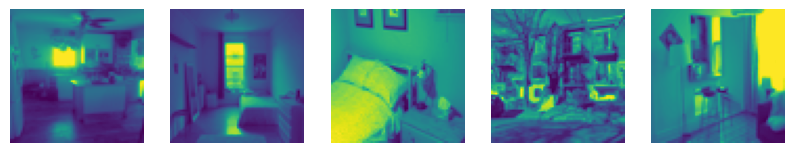

In [ ]:
# Plot the first 5 preprocessed images
num_images_to_display = 5
plt.figure(figsize=(10, 5))
for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(preprocessed_test_images[i])
    plt.axis('off')

# Show the plot with the first 5 preprocessed images
plt.show()

In [ ]:
preprocessed_test_images.shape

(7360, 64, 64)

In [ ]:
X_test_text.shape

(7360, 100)

### **Get Prediction**

In [ ]:
y_test_pred_1 = model_1.predict(X_test_text)
y_test_pred_2 = model_2.predict(X_test_text)
y_test_pred_3 = model_3.predict(preprocessed_test_images)
y_test_pred_4 = model_4.predict(preprocessed_test_images)



230/230 [==============================] - 43s 188ms/step


In [ ]:
y_test_pred_5 = model_5.predict([X_test_text, preprocessed_test_images])


230/230 [==============================] - 43s 185ms/step


In [ ]:
y_test_pred_6 = model_6.predict({'text_input': X_test_text, 'image_input': preprocessed_test_images})

230/230 [==============================] - 13s 55ms/step


### **Saving prediction files**

In [ ]:
submission_1 = pd.DataFrame({'id': id, 'price': np.argmax(y_test_pred_1,axis=1)})

submission_1.to_csv('y_test_pred_1.csv', index=False)

In [ ]:
submission_2 = pd.DataFrame({'id': id, 'price': np.argmax(y_test_pred_2,axis=1)})

submission_2.to_csv('y_test_pred_2.csv', index=False)

In [ ]:
submission_3 = pd.DataFrame({'id': id, 'price': np.argmax(y_test_pred_3,axis=1)})

submission_3.to_csv('y_test_pred_3.csv', index=False)

In [ ]:
submission_4 = pd.DataFrame({'id': id, 'price': np.argmax(y_test_pred_4,axis=1)})

submission_4.to_csv('y_test_pred_4.csv', index=False)

In [ ]:
submission_5 = pd.DataFrame({'id': id, 'price': np.argmax(y_test_pred_5,axis=1)})

submission_5.to_csv('y_test_pred_5.csv', index=False)

In [ ]:
submission_6 = pd.DataFrame({'id': id, 'price': np.argmax(y_test_pred_6[0],axis=1)})

submission_6.to_csv('y_test_pred_6.csv', index=False)

#**Questions:**

###1.**Is fully-connected model a good one for sequential data? Why? How about for image data? Is it good? Why?**



A fully-connected model can be effective for processing certain types of sequential data but is not suitable for raw image data.

**For sequential data:**
Fully-connected models are suitable for fixed-length sequential data where each element in the sequence has a clear relationship with every other element. They work well for tasks like sentiment analysis, sequence classification, or short text processing. The model's dense connectivity allows it to capture complex patterns and dependencies within the sequence, making it effective for tasks with structured sequential input.

**For image data:**
Fully-connected models are not suitable for raw image data due to their inability to handle high-dimensional inputs efficiently. Images contain spatial information that requires specialized processing to capture patterns effectively. Convolutional Neural Networks (CNNs) are the standard choice for image data due to their ability to extract spatial features through convolutional layers and reduce the number of parameters with weight sharing. CNNs are designed to exploit the spatial hierarchies present in images, making them more effective and efficient than fully-connected models for image-related tasks like image classification, object detection, and image generation.

###2. **What is gradient vanishing and gradient explosion, and how GRU/LSTM tries to mitigate this problem?**



**Gradient Vanishing:** This occurs when the gradients during backpropagation become extremely small as they propagate through layers, causing the network to learn slowly or stagnate. It often occurs in deep networks with long sequences or deep architectures, where the gradients diminish exponentially, leading to ineffective weight updates and difficulty in learning long-range dependencies.

**Gradient Explosion:** In contrast, gradient explosion happens when gradients become extremely large, causing unstable training and oscillations in model parameters. It often occurs in networks with exploding gradients due to factors like improper initialization, large learning rates, or unstable architectures.

**Mitigation by GRU/LSTM:**

- GRU  and LSTM  networks address these problems through gated mechanisms.
- Gating Mechanisms: Both GRU and LSTM use gates (forget gate, input gate, output gate) to control the flow of information, mitigating gradient  vanishing by allowing the network to selectively update or forget information based on context.
- Cell State Preservation: LSTM maintains a cell state, allowing information to persist across time steps and mitigating gradient vanishing by facilitating the flow of relevant information.
- Gradient Clipping: Additionally, both GRU and LSTM often employ gradient clipping techniques to prevent gradient explosion by limiting the magnitude of gradients during training, ensuring stable optimization.

`Overall, GRU and LSTM networks mitigate gradient vanishing and explosion issues through gated mechanisms, cell state preservation, and gradient clipping, enabling more effective learning and handling of long-range dependencies in sequential data.`

###3.  **What is multi-objective/multi-task learning? What is multi-modality learning? How do you use them in this assignment?**


**Multi-task learning (MTL)** involves solving multiple learning tasks simultaneously, benefiting from similarities and differences between them. This approach can improve learning efficiency and prediction accuracy compared to training separate models for each task.

**Multimodal AI** combines different data types (like images, text, speech, and numerical data) using various intelligence processing algorithms. This new AI paradigm aims to achieve better performance by leveraging the strengths of multiple data sources and processing techniques.

**In our assignment,** we had two input features: a summary (text) and an image, and we needed to predict both the type and price of an item. To handle this dual prediction task, we used multimodality, which allowed us to combine information from both text and images to predict two different labels. This approach enhances our model's ability to understand and make predictions based on diverse input types, leading to more accurate results.

###4.	**What is the difference among xgboost, lightgbm and catboost**

1. **XGBoost (Extreme Gradient Boosting):**
- **Algorithm:** It uses a pre-sorted algorithm for node splitting during gradient boosting. It employs an optimized data structure called a 'sparse-aware' data structure, which enhances memory efficiency and speeds up computations.
- **Categorical Features:** XGBoost requires categorical features to be preprocessed, usually through one-hot encoding, before training the model.
- **Performance:** Known for its accuracy and versatility, XGBoost is widely used in machine learning competitions and various applications. However, its pre-sorted algorithm can be memory-intensive, leading to potential slower performance on large datasets.
2. **LightGBM (Light Gradient Boosting Machine):**
- **Algorithm:** It uses a histogram-based approach for node splitting, which reduces memory usage and speeds up training. It builds histograms of feature values to find optimal splits, making it highly efficient, especially on large datasets.
-**Categorical Features:** LightGBM supports categorical features directly, eliminating the need for preprocessing. This feature enhances efficiency and simplifies the workflow, especially for datasets with mixed data types.
- **Performance:** LightGBM is optimized for speed and memory efficiency, making it ideal for large-scale datasets and real-time applications where fast training and prediction are crucial.
3. **CatBoost (Categorical Boosting):**
- **Algorithm:** It is designed specifically for datasets with categorical features. It automatically handles categorical variables during training, incorporating them seamlessly into the boosting process without requiring preprocessing.
- **Performance:** CatBoost strikes a balance between performance and ease of use. It simplifies workflow by automating categorical feature handling, making it suitable for tasks where minimal preprocessing and feature engineering are desired.
- **Usage:** CatBoost is particularly useful when dealing with categorical data directly from the dataset, as it streamlines the training process and reduces the need for manual data preparation steps.

` In summary,  XGBoost offers accuracy and flexibility but may require more memory and preprocessing effort for categorical features. LightGBM excels in speed, efficiency, and direct support for categorical features, making it ideal for large datasets. CatBoost stands out for its automatic handling of categorical features, simplifying the workflow and making it user-friendly for tasks with mixed data types.`